In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/2d17a121-d862-4e5f-8696-8e19011a0f01/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data= pd.read_csv("IMDb_Movies_India[1].csv",encoding=("ISO-8859-1"))
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=data.dropna()

In [6]:
df.shape

(5659, 10)

In [7]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

/tmp/ipykernel_1652/4192921935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
/tmp/ipykernel_1652/4192921935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
/tmp/ipykernel_1652/4192921935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [9]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [10]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


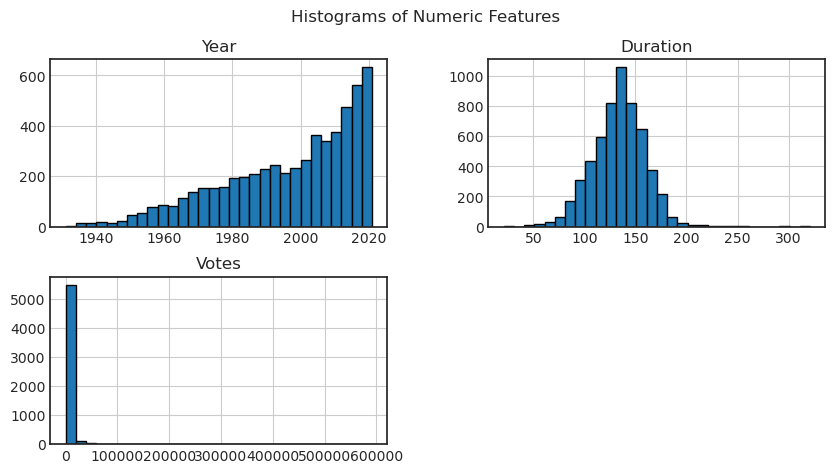

In [11]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()


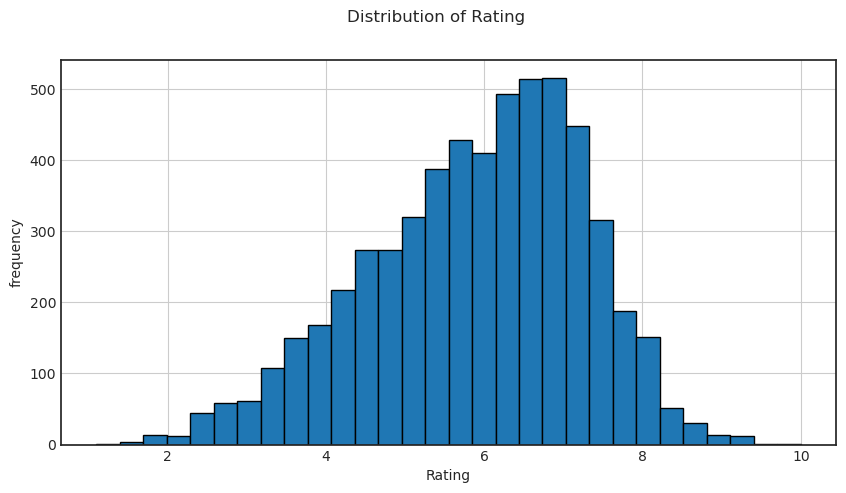

In [12]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

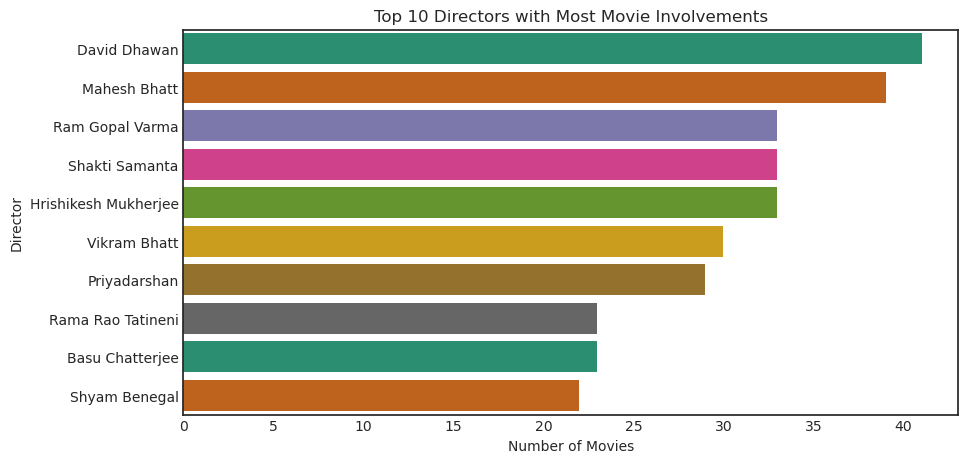

In [13]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

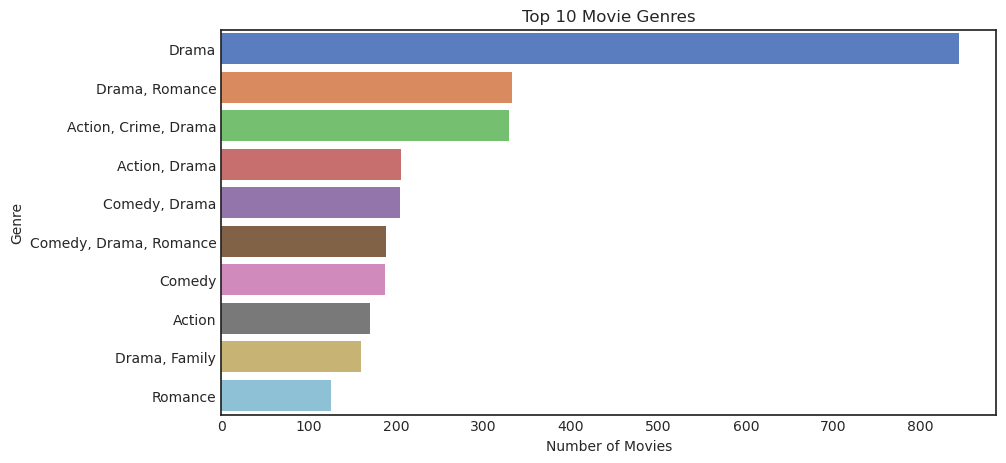

In [14]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [15]:
# Top 10 Actors With Most Movie Involvements
# Combine the three actor columns into one Series
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Display the top 10 actors
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64

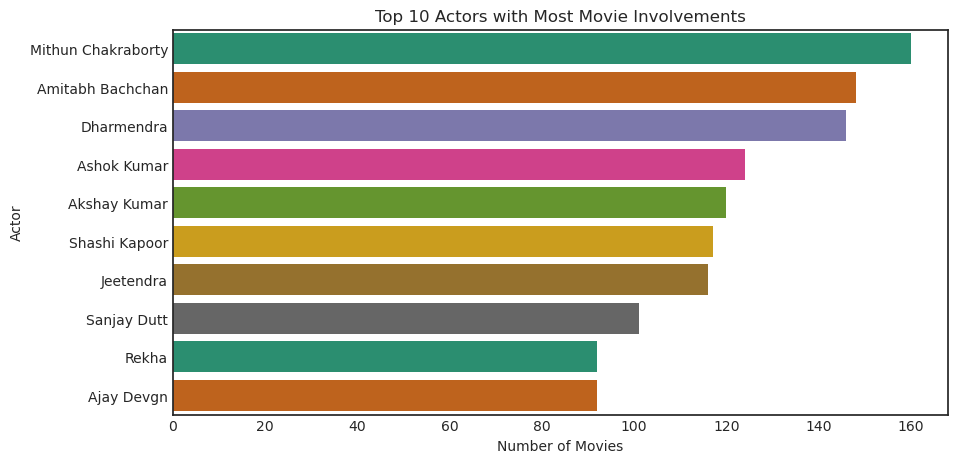

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [18]:
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
967,An Insignificant Man,2016,96,"Documentary, Thriller",8.7,1928,Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1432,Awasaan,2020,101,Drama,8.7,21,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain
1469,B for Bundelkhand,2017,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
1709,Bahattar Hoorain,2019,120,Comedy,8.8,23,Sanjay Puran Singh Chauhan,Narottam Bain,Aamir Bashir,Pawan Malhotra
1729,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
2093,Bhagwan Parshuram,1970,136,Drama,8.7,10,Babubhai Mistry,Niranjan Sharma,Shalini,Trilok Kapoor
2437,Black Rose,2020,120,Thriller,8.6,38,Hemant N Mishra,Samiksha Bhatnagar,Rahul Chawla,Abhilash Dada
2709,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,2016,134,Animation,8.6,656,Harry Baweja,Harman Baweja,Pawan Kalra,Om Puri


In [19]:
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


<Axes: >

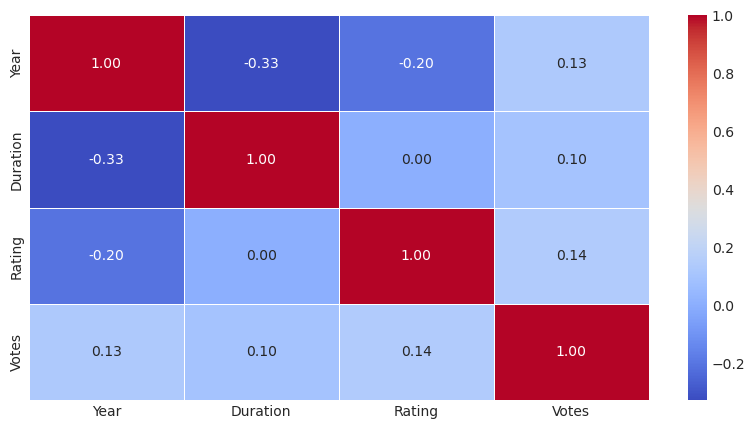

In [21]:
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)  

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

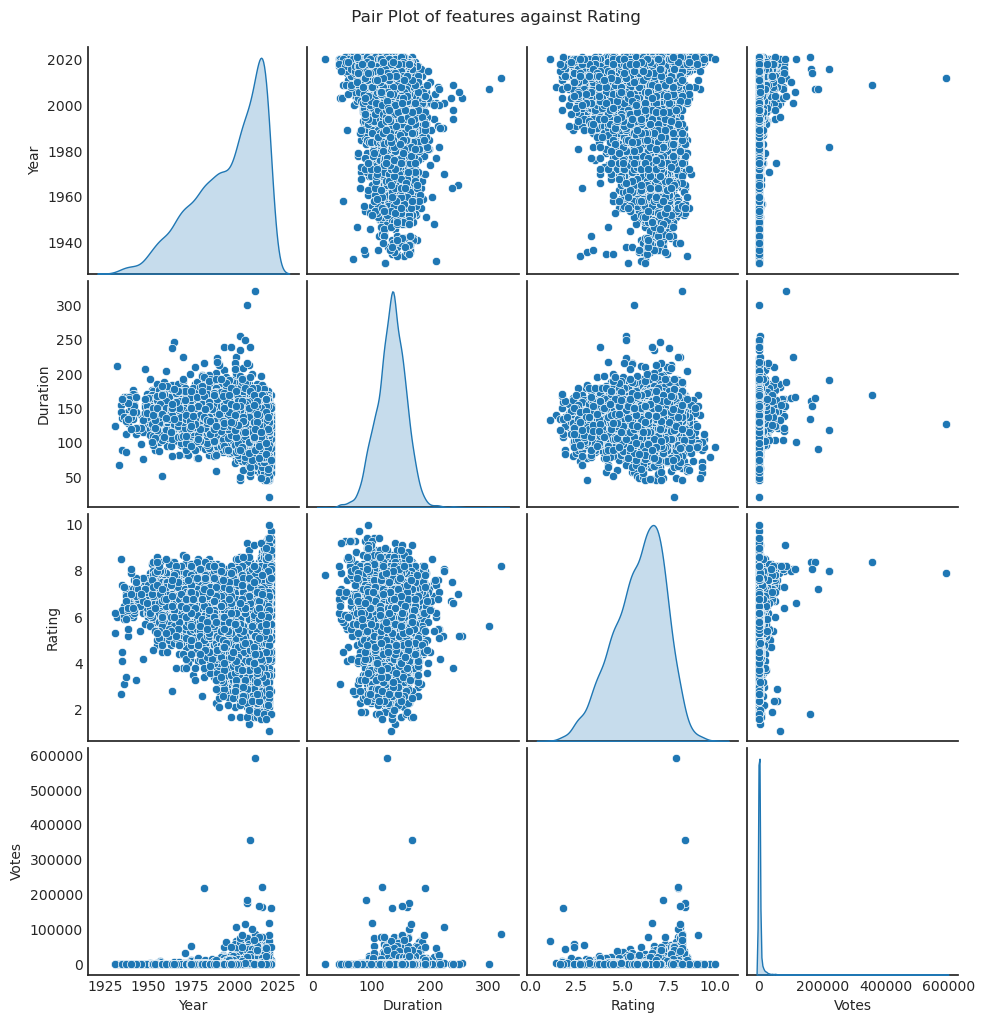

In [22]:
sns.pairplot(new_df,diag_kind='kde')
plt.suptitle(' Pair Plot of features against Rating', y=1.02)
plt.show()

In [23]:
df= df.drop('Name',axis=1)

In [24]:
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating

df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


In [25]:
# Data Splitting 


In [26]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [28]:
train_data= x_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
3974,1967,117,171,6.007229,6.550000,6.919355,6.616667,6.981818,6.9
3888,2003,91,150,5.850000,5.025000,4.500000,4.500000,5.969231,4.8
6671,1970,216,140,5.092500,6.782353,5.926667,6.035000,6.484615,7.1
7499,1996,3110,160,6.449462,7.122222,4.880000,6.600000,5.654545,7.5
11201,2001,44,157,5.092500,6.275000,6.567568,6.500000,6.500000,6.5
...,...,...,...,...,...,...,...,...,...
10216,2019,200,95,5.826316,5.900000,6.362500,6.450000,6.875000,5.9
13408,2014,31,134,5.040588,5.900000,5.480000,5.900000,5.125000,5.9
7679,1992,17,155,5.040588,5.800000,5.926667,6.537500,5.185714,5.8
10217,2011,99,95,6.415521,9.100000,9.100000,9.100000,6.733333,9.1


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

x_train, y_train = train_data[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']], train_data['Rating']

#Build a Linear Regression model
fitted_model_lr = LinearRegression()
#Train the model
fitted_model_lr.fit(x_train,y_train)
#Make predictions
y_pred_lr = fitted_model_lr.predict(x_test)

#Build a Random Forest Model
fitted_model_rf = RandomForestRegressor()


In [31]:
#Train the model
fitted_model_rf.fit(x_train, y_train)
#Make predictions
y_pred_rf = fitted_model_rf.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


MSE_lr =  mean_squared_error(y_test, y_pred_lr) 
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)

print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)

MSE_rf =  mean_squared_error(y_test, y_pred_rf) 
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.40401452095872487
Mean absolute error value is:  0.468017713465461
R2 score value is:  0.7870091488262905

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.3192377075971731
Mean absolute error value is:  0.38554681978798594
R2 score value is:  0.8317023088513884


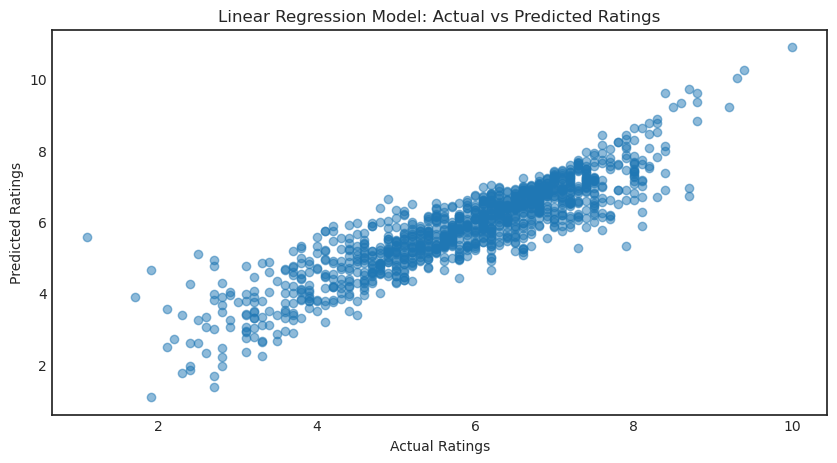

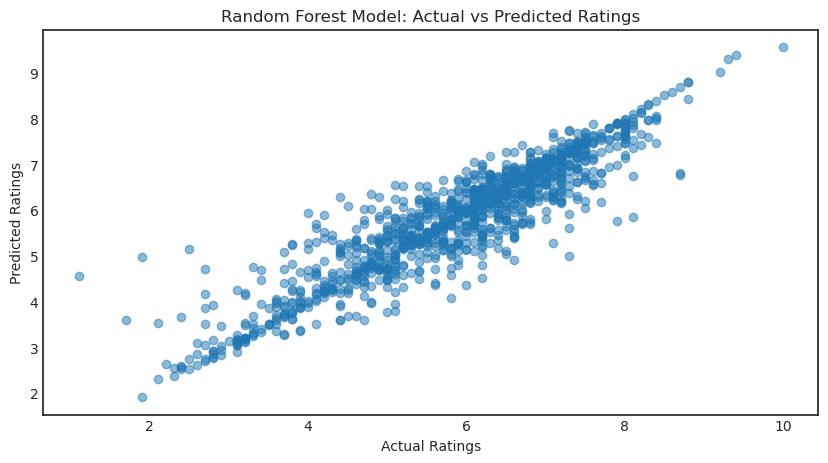

In [33]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


In [34]:
x.head(10)

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,8,109,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,326,82,5.477778,5.600000,5.600000,5.883333,5.600000
9,2014,11,116,5.337778,4.000000,4.000000,4.550000,4.000000
10,2004,17,96,6.415521,6.200000,5.480000,5.450000,5.233333
11,2016,59,120,4.648649,6.950000,6.066667,5.900000,5.900000
12,1991,983,161,5.400000,4.907143,5.187179,5.976190,5.041667
13,2012,512,166,5.765957,5.700000,6.300000,5.700000,5.700000


In [35]:
data = {'Year': [2020], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)

In [36]:
predict_rating=fitted_model_rf.predict(trail_data)
predict_rating[0]

5.54